In [13]:
import numpy as np
import os
import pandas as pd
import nbimporter
from pred import preprocess_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv('../cleaned_data/merged_data.csv')

In [15]:
X = df[['County', 'State', 'Total', 'Less than $10,000', '$10,000 to $14,999', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $149,999', '$150,000 to $199,999', '$200,000 or more', 'Median income', 'Mean income', 'Sex', 'ethnicity']]
y = df['Heart Disease Mortality']

In [16]:
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df)

In [17]:
rf_regressor_optimized = Pipeline([
     ('preprocessor', preprocessor),
     ('regressor', RandomForestRegressor(random_state = 42, n_estimators = 200, max_depth = 7, max_features = None, min_samples_split=2, min_samples_leaf=4))
     ])

In [18]:
rf_regressor_optimized.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['County', 'State', 'Total',
                                                   'Median income',
                                                   'Mean income', 'Sex',
                                                   'ethnicity']),
                                                 ('pct',
                                                  Pipeline(steps=[('custom',
                                                                   CustomPreprocessor(preprocess_features=['Less '
                                                                                                           'than '...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Less than $10,000',
                                                   '$10,000 to $14,999',
                                                   '$15,000 to $24,999',
                                                   '$25,000 to $34,999',
                                                   '$35,000 to $49,999',
                                                   '$50,000 to $74,999',
                                                   '$75,000 to $99,999',
                                                   '$100,000 to $149,999',
                                                   '$150,000 to $199,999',
                                                   '$200,000 or more'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=7, max_features=None,
                                       min_samples_leaf=4, n_estimators=200,
                                       random_state=42))])

In [19]:
y_hat_test = rf_regressor_optimized.predict(X_test)
y_hat_train = rf_regressor_optimized.predict(X_train)

In [20]:
test_mse = mean_squared_error(y_test, y_hat_test)
rmse = np.sqrt(test_mse)
r_squared = r2_score(y_test, y_hat_test)
print(rmse)
print(r_squared)

101.9723465727707
0.5830582762509917


In [21]:
print(rf_regressor_optimized.named_steps['regressor'].feature_importances_)

[0.         0.         0.         ... 0.01432179 0.00835415 0.01799095]


In [22]:
e = (y_train - y_hat_train)
std_residuals = (e - e.mean()) / e.std(ddof=1)

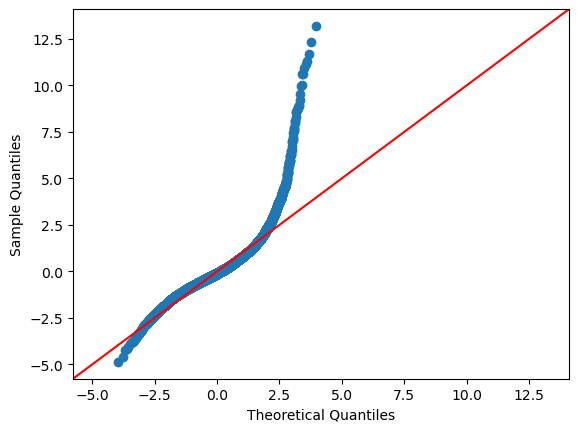

In [23]:
sm.qqplot(std_residuals, line="45")
plt.show()